## Wk1 Intro to Data

#### Varibles Types:

- Continuous Quantitative: Continuous, Discrete
- Categorical/Qualitative: Ordinal (order), Nominal

#### Study Design

- Confimatory vs. Exploratory
    - Confimatory: test falsifiable hypothesis. collect data to address single question
    - Exploratory: collect and analyze data without question
    - Both informative but be careful with overfitting, multiple testing, and p-hacking. More questions mean more likelihood to drawing a misleading conclusion
- Comparative vs. Non-comparative
- Observational studies vs Experiments
- Power (Analysis): Process to assess whether given study design yield to meaningful findings
- Bias: Measurements that are systematically off-target, or sample doesn't represent population

## Wk2 Univariate Data

- Categorical: Frequency Table (`.value_counts()`), Bar Chart, Pie Chart (not recommended)
- Quantitative:
    - Histograms
        - Shape, Center, Spread, Outliers
    - Numeircal Summaries
        - Min, 1Q, Median, 3Q, Max
        - StD, n
    - Boxplots
        - show 5-number summary and outliers
        - show outliers but hide gaps and clusters
- Standard (Z) Score: $ \frac{x - \mu}{\sigma} $
- Empircal Rule: 68/95/99.7

### SciPy.Stats

The SciPy.Stats module contains a large number of probability distributions as well as a growing library of statistical functions such as:

* Continuous and Discrete Distributions (i.e Normal, Uniform, Binomial, etc.)

* Descriptive Statistcs

* Statistical Tests (i.e T-Test)

In [1]:
from scipy import stats
import numpy as np
### Print Normal Random Variables
print(stats.norm.rvs(size = 10))

[ 0.25044333  0.9004512   0.09516733  2.38785434 -0.84010961  0.48256759
  0.69276662  0.81724958  0.12649396 -0.88735496]


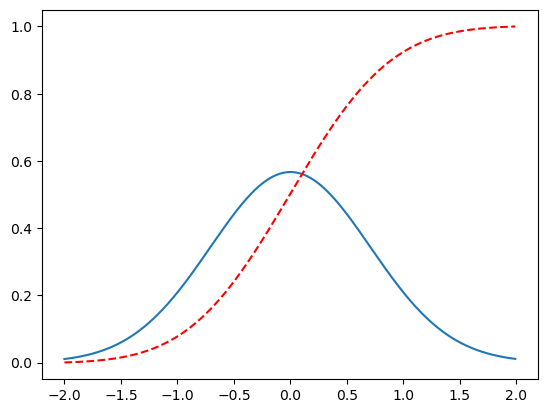

In [2]:
from pylab import *

# Create some test data
dx = .01
X  = np.arange(-2,2,dx)
Y  = exp(-X**2)

# Normalize the data to a proper PDF
Y /= (dx*Y).sum()

# Compute the CDF
CY = np.cumsum(Y*dx)

# Plot both
plot(X,Y)
plot(X,CY,'r--')

plt.show()

In [3]:
from scipy import stats
### Compute the Normal CDF of certain values.
print(stats.norm.cdf(np.array([1,-1., 0, 1, 3, 4, -2, 6])))
print(stats.norm.pdf(np.array([1,-1., 0, 1, 3, 4, -2, 6])))

[0.84134475 0.15865525 0.5        0.84134475 0.9986501  0.99996833
 0.02275013 1.        ]
[2.41970725e-01 2.41970725e-01 3.98942280e-01 2.41970725e-01
 4.43184841e-03 1.33830226e-04 5.39909665e-02 6.07588285e-09]


#### Descriptive Statistics

In [5]:
np.random.seed(282629734)

# Generate 1000 Student’s T continuous random variables.
x = stats.t.rvs(10, size=1000)
# Do some descriptive statistics
print(x.min())   # equivalent to np.min(x)

print(x.max())   # equivalent to np.max(x)

print(x.mean())  # equivalent to np.mean(x)

print(x.var())   # equivalent to np.var(x))

stats.describe(x)

-3.7897557242248197
5.263277329807165
0.014061066398468422
1.288993862079285


DescribeResult(nobs=1000, minmax=(-3.7897557242248197, 5.263277329807165), mean=0.014061066398468422, variance=1.2902841462255106, skewness=0.21652778283120955, kurtosis=1.055594041706331)

Example of pivot table on 

In [ ]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide' (PIVOT)
# dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
dx

## Wk3 Multivariate Data

- Two-way Table:
    - Marginal Distribution
    - Conditional Distribution
- Multivariate Categorical:
    - Graphs: (Univariate/ Side-by-side / Stacked) bar charts and mosaic plots
- Multivariate Quantitative:
    - Graphs: Univariate histograms, scatterplot (jointplot includes histogram with scatterplot)
    - Association: **Type** (e.g. none, linear), **Direction** (positive/negative), **Strength**
        - Correlation: Pearson correlation (R or $\rho$)
            - Correlation does not imply causation (may be confounding variables)
    - Identify potential outliers
 

In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [13]:
# Download NHANES 2015-2016 data
url = 'https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv'
df = pd.read_csv(url)
df.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


In [12]:
keep = [column for column in df.columns if 'BMX' in column]
df_BMX = df[keep]
df_BMX.head(2)

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9


Indexing and Changing valuues with `.loc[]` and `.iloc[]`

In [15]:
# df.loc[:, keep]

# index_bool = np.isin(df.columns, keep)
# df.iloc[:,index_bool].head() # Indexing with boolean list

# df[condition returning bool_series]
# df.loc[conditional, :]

Multivariate Distributions:
- joint plots allow us to see these marginal distributions in histograms and a shared scatterplot

Unit Testing

Look at Unit Testing vids (pytest or unittest)

Look at "Python Tutorial: if \__name__ == \'__main__'"

In [ ]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

## Wk4 Populations and Samples

- Sampling:
    1. Specifically define target population. 
        - Define setting (where, when, etc.)
    2. Get a census/sample
        - Census
        - Probability Sampling
            - construct sampling frame
            - determine probability of selection for every unit
            - randomly select units from list (frame)
            - attempt to measure units
        - Non-Probability Sampling
            - selection not random (and probabilities can't be determined)
            - prone to bias
- Probability Sampling
    - SRSampling: Every unit and potential sample of units has equal probability of being drawn
        - observations are i.i.d. (independent and identically distributed)
    - Complex Sampling: population divided into strata, clusters randomly sampled within strata, units randomly sammpled from within clusers
        - $probability_{selection} = (\frac{a}{A})(\frac{b}{B})$ where we select $a$ of $A$ clusters then select $b$ of $B$ units


- Non-probability Sampling
    - data divided strata ot clusters but not randomly
    - cheaper than probability sampling
    - no statistical basis for making inference
    - 2 approaches:
        - Pseudo-Randomization:
            - combine (stack) non-probability and probability samples
            - then estimate probability of being included in non-probability sample
            - treat estimated probabilities as "known", and use probability sampling methods
        - Calibration:
            - compute weights for responding units to mirror known population

- Sampling Distributions
    - distibution of survey estimates if we selected many random samples using same sampling design, and computed an estimate from each
    - CLT: the distribution *of the sample means* of a large number of i.i.d. random variables approaches a normal distribution, regardless of the shape of the original population distribution. (i.e. as the sample size increases, the sampling distribution of the mean becomes approximately normal, regardless of the population distribution)
- Sampling variance / sampling errors

#### Making Population Inference Based on One Sample
- CI estimate for parameters of interest (e.g. mean, regr. coeff, proportion, etc.)
- Hypothesis testing about parameters of interest

- Assume normality in sampling distributions of estimate

1. Compute point estimate
    - unbiased point estimate: average of all possible values for point estimate (EV) is equal to true parameter value
2. Estimate sampling variance
    - compute unbiased estimate of the variance
    - Standard error: square root of variance

CI is Best Estimate +/- MoE

$$Test Stat = \frac{estimate - null value}{standard error}$$